Performance vs # of training sample graph(on the 43 categories where relevant data were provided: https://docs.google.com/spreadsheets/d/19qZ1V0q1JzYOPmFoXOAtt0s3NJLYjQEE)

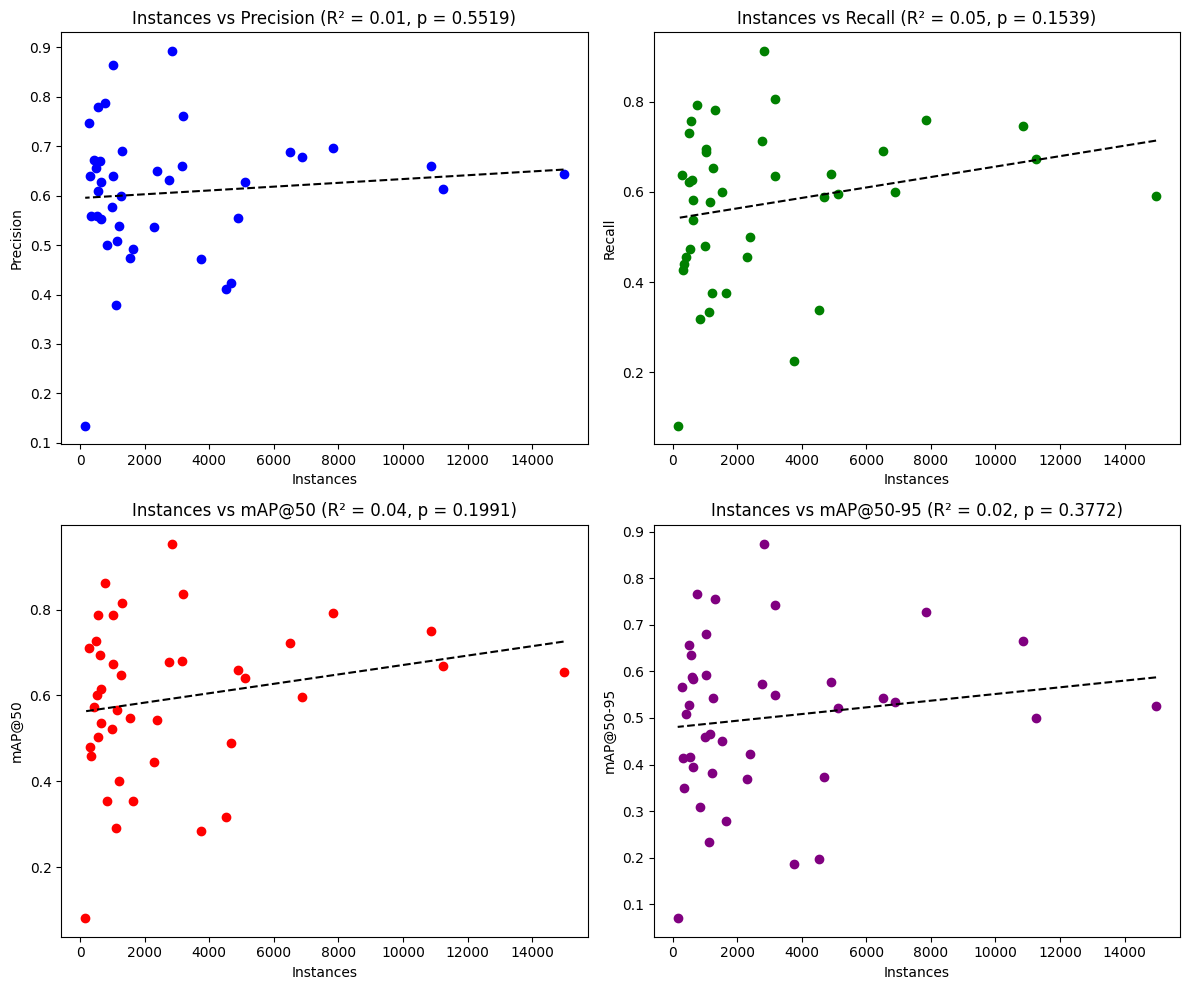

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

file_path = 'Performance datapoints.ods' # Extracted form https://docs.google.com/spreadsheets/d/19qZ1V0q1JzYOPmFoXOAtt0s3NJLYjQEE
data = pd.read_excel(file_path, engine='odf')

instances = data['Instances']
precision = data['Precision']
recall = data['Recall']
map_50 = data['mAP@50']
map_50_95 = data['mAP@50-95']

threshold = data['Instances'].quantile(0.99)

filtered_data = data[data['Instances'] <= threshold]

instances_filtered = filtered_data['Instances']
precision_filtered = filtered_data['Precision']
recall_filtered = filtered_data['Recall']
map_50_filtered = filtered_data['mAP@50']
map_50_95_filtered = filtered_data['mAP@50-95']

def plot_with_fit_and_pvalue(ax, x, y, title, xlabel, ylabel, color):
    ax.scatter(x, y, color=color)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * np.array(x) + intercept

    ax.plot(x, line, color='black', linestyle='--')
    ax.set_title(f'{title} (R² = {r_value**2:.2f}, p = {p_value:.4f})')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Plotting the graphs with fitted lines, R-squared values, and p-values
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Instances vs Precision
plot_with_fit_and_pvalue(axs[0, 0], instances_filtered, precision_filtered, 'Instances vs Precision', 'Instances', 'Precision', 'b')

# 2. Instances vs Recall
plot_with_fit_and_pvalue(axs[0, 1], instances_filtered, recall_filtered, 'Instances vs Recall', 'Instances', 'Recall', 'g')

# 3. Instances vs mAP@50
plot_with_fit_and_pvalue(axs[1, 0], instances_filtered, map_50_filtered, 'Instances vs mAP@50', 'Instances', 'mAP@50', 'r')

# 4. Instances vs mAP@50-95
plot_with_fit_and_pvalue(axs[1, 1], instances_filtered, map_50_95_filtered, 'Instances vs mAP@50-95', 'Instances', 'mAP@50-95', 'purple')

plt.tight_layout()
plt.show()
